# Model simulation and sanity check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
from agent import run_experiment, Bandit, Agent
bandit = Bandit()

# Rescorla Wagner

Running a go-nogo experiment simulation with params = {'alpha': 0.3, 'beta': 4, 'noise': 0, 'bias': 0, 'Pav': 0}


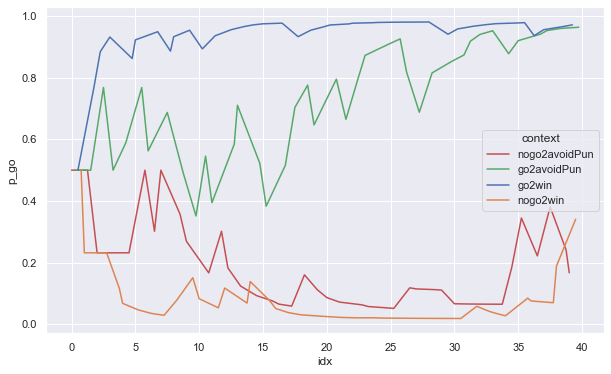

In [26]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.3, 'beta': 4, 'noise': 0, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [27]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW')

max_likelihood.fit_model()

      fun: 49.251284398881914
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.26325642e-06, -4.26325644e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([0.27794423, 4.58787424])

# Rescorla Wegner + Noise

Running a go-nogo experiment simulation with params = {'alpha': 0.4, 'beta': 3, 'noise': 0.3, 'bias': 0, 'Pav': 0}


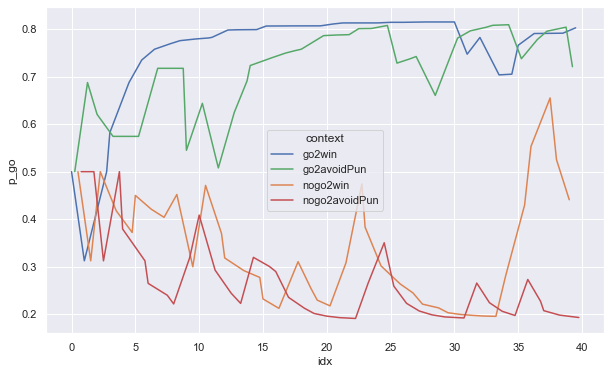

In [28]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.4, 'beta': 3, 'noise': 0.3, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)


In [29]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise')

max_likelihood.fit_model()

      fun: 92.83376905121172
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.43529632e-04,  5.68434192e-06,  7.53175300e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 80
      nit: 14
     njev: 20
   status: 0
  success: True
        x: array([0.51114853, 3.46070042, 0.3819731 ])

# Rescorla Wegner + Noise + Go Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 1, 'Pav': 0}


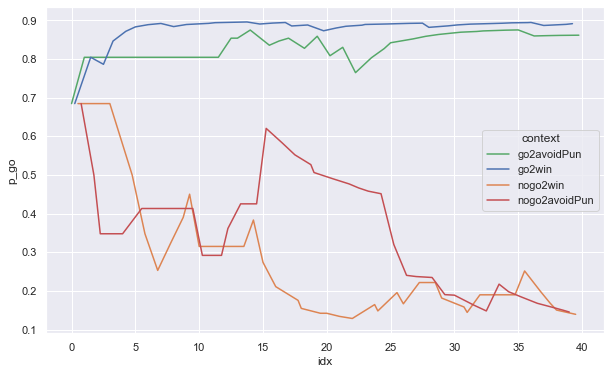

In [34]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 1, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [35]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias')

max_likelihood.fit_model()

      fun: 77.2799035916293
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.12114787e-05, -1.42108548e-05,  8.52651283e-05,  1.19371179e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 130
      nit: 20
     njev: 26
   status: 0
  success: True
        x: array([0.18719954, 4.37581522, 0.14853433, 0.72003836])

# Rescorla Wegner + Noise + Go Bias + Pavlovian Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.2, 'Pav': 0.8}


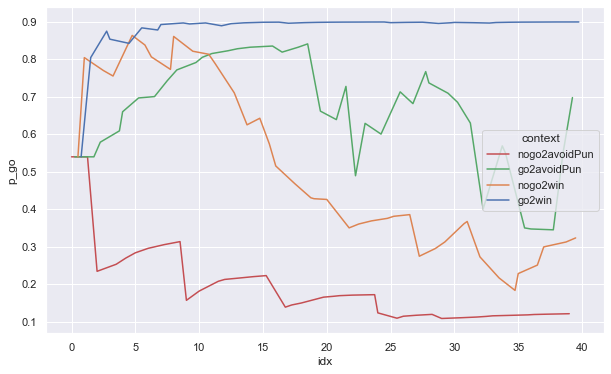

In [42]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.2, 'Pav': 0.8})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [43]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias+Pav')

max_likelihood.fit_model()

      fun: 81.83785962020059
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.67910172e-05,  0.00000000e+00,  1.42108547e-06,  3.07910284e+00,
        5.68434186e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 156
      nit: 19
     njev: 26
   status: 0
  success: True
        x: array([0.15823498, 4.56012152, 0.16696185, 0.        , 0.72548314])